# **Forest Cover Prediction Analysis**

This project involves a comprehensive analysis and modeling process, utilizing various machine learning techniques to predict forest cover types based on cartographic information. Each part of the project builds upon the previous steps, culminating in the creation and evaluation of a robust predictive model.

In [1]:
# Import necessary packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Loading Data; Preliminary Analysis

In [2]:
# Load the dataset into a DataFrame
fc = pd.read_csv('../input/forest-cover/forest_cover.txt', delimiter='\t')

# Display the first 5 rows of the DataFrame
fc.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


In [3]:
# Print the shape of the DataFrame
print("Shape of fc DataFrame:", fc.shape)

Shape of fc DataFrame: (15120, 13)


In [4]:
# Display the distribution of cover types
fc['Cover_Type'].value_counts().sort_index()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64

In [5]:
# Create a list named palette containing seven named colors
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Distribution of Cover Type by Wilderness Area

In this section, I will explore the relationship between cover type and wilderness area. I will start by determining the distribution of the wilderness areas within the dataset.

In [6]:
# Display the distribution of wilderness areas within the dataset
wilderness_area_distribution = fc['Wilderness_Area'].value_counts().sort_index()
wilderness_area_distribution

Wilderness_Area
Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: count, dtype: int64

In [7]:
# Create a DataFrame to count the number of regions of each cover type in each of the four wilderness areas
ct_by_wa = pd.crosstab(fc['Cover_Type'], fc['Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


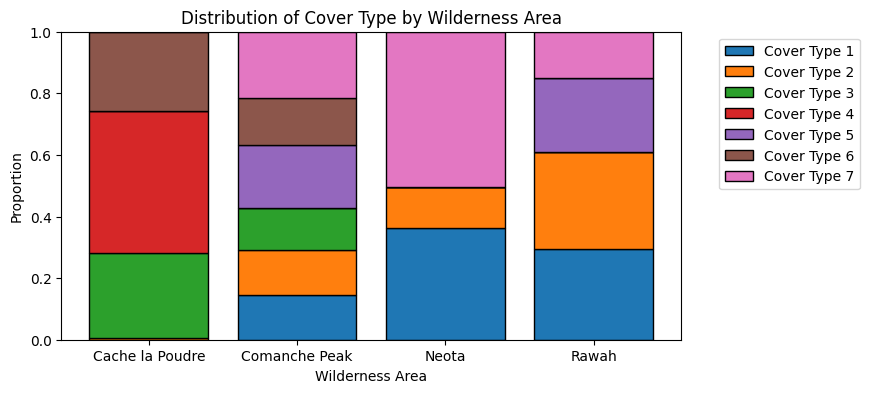

In [8]:
# Convert the count information into proportions
ct_by_wa_props = ct_by_wa.div(ct_by_wa.sum(axis=0), axis=1)

# Calculate the bottom of each bar
bb = np.cumsum(ct_by_wa_props, axis=0) - ct_by_wa_props

# Create a Matplotlib figure
plt.figure(figsize=[8, 4])

# Define the color palette for the bars
palette = plt.get_cmap('tab10').colors

# Loop over the rows of ct_by_wa_props to create a stacked bar chart
for i, (index, row) in enumerate(ct_by_wa_props.iterrows()):
    plt.bar(ct_by_wa.columns, row, bottom=bb.loc[index], edgecolor='black', color=palette[i], label=f'Cover Type {index}')

# Set labels for the x and y axes and the title
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')

# Add a legend to the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the figure
plt.show()